In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("datasets.csv")
df.head(30)

,Unnamed: 0,studentID,personal_statement,award_name,award_classification
0,0,130012955,"In the UK, 1 in 5 people will suffer from depr...",Diploma of Higher Education (Medical Science),PASS
1,1,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
2,2,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
3,3,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
4,4,170007122,"When I was 7 years old, I visited Professor Gu...",Master of Science,DIST
5,5,170008749,"Medicine appealed to me, as it combines my int...",Master of Science,MERIT
6,6,170011945,I want to be a doctor to help people through p...,Master of Science,MERIT
7,7,170012676,From the early stages of my dental training I ...,Bachelor of Medicine and Bachelor of Surgery w...,HONS
8,8,19969003,-,Record of achievement,CRPASS
9,9,199921636,I am applying for the learning disability nurs...,Bachelor of Science with Honours,FIRST


# 1. VIEW INFO ABOUT DATA AND CLEAN THE DATA

In [3]:
df.columns

Index(['Unnamed: 0', 'studentID', 'personal_statement', 'award_name',
       'award_classification'],
      dtype='object')

In [4]:
# View size of data
df.shape

(16769, 5)

In [5]:
# view info about data, showing its null and non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16769 entries, 0 to 16768
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            16769 non-null  int64 
 1   studentID             16769 non-null  int64 
 2   personal_statement    16768 non-null  object
 3   award_name            16769 non-null  object
 4   award_classification  16769 non-null  object
dtypes: int64(2), object(3)
memory usage: 655.2+ KB


In [6]:
# from the info above, there is a column name Unnamed that isn't needed, so we drop it.

df.columns

Index(['Unnamed: 0', 'studentID', 'personal_statement', 'award_name',
       'award_classification'],
      dtype='object')

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df.columns

Index(['studentID', 'personal_statement', 'award_name',
       'award_classification'],
      dtype='object')

In [9]:
# view data
df.head()

,studentID,personal_statement,award_name,award_classification
0,130012955,"In the UK, 1 in 5 people will suffer from depr...",Diploma of Higher Education (Medical Science),PASS
1,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
2,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
3,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
4,170007122,"When I was 7 years old, I visited Professor Gu...",Master of Science,DIST


In [10]:
# check for duplicates counts because there are duplicates.
df.duplicated().sum()

7395

In [11]:
# drop all duplicates and leave only first occurance of data

df = df.drop_duplicates(keep='first')
df.shape

(9374, 4)

In [12]:
# Check for NaN values
df.isnull().sum()

studentID               0
personal_statement      1
award_name              0
award_classification    0
dtype: int64

In [13]:
df['personal_statement'].isnull().values.any()

True

In [14]:
df[df.isna().any(axis=1)]

,studentID,personal_statement,award_name,award_classification
8891,201803289,NaN,Bachelor of Science with Honours,2:1


In [15]:
# since the row has no personal statement, we can drop it.
# NB: If there were many rows with no available personal statement, treating them differently will be better than dropping them.
print(f'Before dropping NA, shape is: {df.shape}')
df.dropna(inplace=True)
print(f'After dropping NA, shape is: {df.shape}')

Before dropping NA, shape is: (9374, 4)
After dropping NA, shape is: (9373, 4)


In [16]:
df.head(10)

,studentID,personal_statement,award_name,award_classification
0,130012955,"In the UK, 1 in 5 people will suffer from depr...",Diploma of Higher Education (Medical Science),PASS
1,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
4,170007122,"When I was 7 years old, I visited Professor Gu...",Master of Science,DIST
5,170008749,"Medicine appealed to me, as it combines my int...",Master of Science,MERIT
6,170011945,I want to be a doctor to help people through p...,Master of Science,MERIT
7,170012676,From the early stages of my dental training I ...,Bachelor of Medicine and Bachelor of Surgery w...,HONS
8,19969003,-,Record of achievement,CRPASS
9,199921636,I am applying for the learning disability nurs...,Bachelor of Science with Honours,FIRST
11,199922311,I want to teach because I want to share my lov...,Record of achievement,CRPASS
12,199926834,Why I am applying for adult nursing: Working i...,Record of achievement,CRPASS


In [17]:
# Get data where award names containes 'Bachelor' irrespective of the bachelor type.
df = df[df['award_name'].str.contains('Bachelor')]

df.shape

(5781, 4)

In [18]:
# Filter out HONS, MBPASS and ORD from the current data

options = ["FIRST", "2:1", "2:2", "THIRD", "PASS"]
df = df.loc[df['award_classification'].isin(options)]

In [19]:
df.head(10)

,studentID,personal_statement,award_name,award_classification
9,199921636,I am applying for the learning disability nurs...,Bachelor of Science with Honours,FIRST
13,200030551,I wish to apply to university this year as I w...,Bachelor of Arts with Honours,FIRST
15,200127457,I have worked in mainstream and special educat...,Bachelor of Arts with Honours,FIRST
16,200200708,At approximately six years old I remember sitt...,Bachelor of Arts with Honours,FIRST
18,200200788,"When I left school in 1994, I knew I wanted a ...",Bachelor of Science with Honours,2:1
40,200512117,I have been looking forward to getting into te...,Bachelor of Arts with Honours,THIRD
42,200513035,"Nursing, in my own perspective, is a diverse p...",Bachelor of Science with Honours,2:2
46,200610674,I am enthusiastic about the nursing profession...,Bachelor of Science with Honours,2:2
64,200878511,"Nursing to me is an invaluable profession, whi...",Bachelor of Science with Honours,FIRST
74,200888939,The passion I have for nursing comes from witn...,Bachelor of Science with Honours,2:1


In [20]:
# Get all unique awards

unique_awards = df['award_name'].unique()

len(unique_awards)

10

In [21]:
unique_awards

array(['Bachelor of Science with Honours',
       'Bachelor of Arts with Honours',
       'Bachelor of Engineering with Honours',
       'Bachelor of Laws with Honours',
       'Bachelor of Education with Honours',
       'Bachelor of Science (Economics) with Honours',
       'Bachelor of Philosophy with Honours',
       'Bachelor of Music with Honours', 'Bachelor of Arts',
       'Bachelor of Business Administration with Honours'], dtype=object)

In [22]:
# Get all unique awards_classification

award_classification = df['award_classification'].unique()

len(award_classification)

5

In [23]:
award_classification 

array(['FIRST', '2:1', 'THIRD', '2:2', 'PASS'], dtype=object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5700 entries, 9 to 16712
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   studentID             5700 non-null   int64 
 1   personal_statement    5700 non-null   object
 2   award_name            5700 non-null   object
 3   award_classification  5700 non-null   object
dtypes: int64(1), object(3)
memory usage: 222.7+ KB


# 2. EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis, or EDA, is an important step in any Data Analysis or Data Science project. EDA is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset.

EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better

In [25]:
# Knowing frequencies of award

df['award_name'].value_counts()

Bachelor of Science with Honours                    2597
Bachelor of Arts with Honours                       2497
Bachelor of Engineering with Honours                 319
Bachelor of Laws with Honours                        247
Bachelor of Education with Honours                    12
Bachelor of Music with Honours                        12
Bachelor of Philosophy with Honours                   11
Bachelor of Arts                                       2
Bachelor of Business Administration with Honours       2
Bachelor of Science (Economics) with Honours           1
Name: award_name, dtype: int64

In [26]:
# Knowing frequencies of award classification

df['award_classification'].value_counts()

2:1      2652
FIRST    1908
2:2      1012
THIRD     126
PASS        2
Name: award_classification, dtype: int64

In [27]:
# award classification before encoding
target = df['award_classification']
target.head(20)

9      FIRST
13     FIRST
15     FIRST
16     FIRST
18       2:1
40     THIRD
42       2:2
46       2:2
64     FIRST
74       2:1
80       2:2
82       2:2
85       2:1
95       2:1
104    FIRST
106      2:2
121      2:2
128      2:2
135      2:1
145      2:2
Name: award_classification, dtype: object

In [28]:
# Encoding the data labels to numerical category
# Encode target labels with value between 0 and n_classes-1.
# This transformer should be used to encode target values, i.e. y, and not the input X = text

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_target = encoder.fit_transform(df['award_classification'])
df['award_classification'] = encoder.fit_transform(df['award_classification'])

# award classification after encoding
encoded_target[:30]

array([2, 2, 2, 2, 0, 4, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 2, 1, 1, 1, 0, 0])

In [29]:
df.head(20)

,studentID,personal_statement,award_name,award_classification
9,199921636,I am applying for the learning disability nurs...,Bachelor of Science with Honours,2
13,200030551,I wish to apply to university this year as I w...,Bachelor of Arts with Honours,2
15,200127457,I have worked in mainstream and special educat...,Bachelor of Arts with Honours,2
16,200200708,At approximately six years old I remember sitt...,Bachelor of Arts with Honours,2
18,200200788,"When I left school in 1994, I knew I wanted a ...",Bachelor of Science with Honours,0
40,200512117,I have been looking forward to getting into te...,Bachelor of Arts with Honours,4
42,200513035,"Nursing, in my own perspective, is a diverse p...",Bachelor of Science with Honours,1
46,200610674,I am enthusiastic about the nursing profession...,Bachelor of Science with Honours,1
64,200878511,"Nursing to me is an invaluable profession, whi...",Bachelor of Science with Honours,2
74,200888939,The passion I have for nursing comes from witn...,Bachelor of Science with Honours,0


<AxesSubplot:xlabel='award_classification', ylabel='count'>

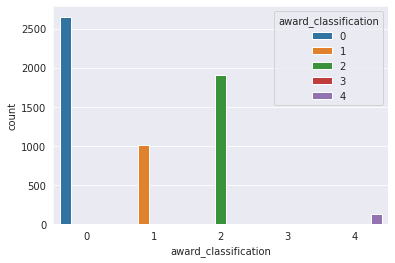

In [31]:
# Barplots of award_classification

import seaborn as sns

sns.set_style('darkgrid')

sns.countplot(x="award_classification", data=df, hue="award_classification")

In [32]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/abbracx/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:

# Get number of characters
df['num_characters'] = df['personal_statement'].apply(len)

# Get number of words
df['num_words'] = df['personal_statement'].apply(lambda x: len(nltk.word_tokenize(x)))


# Get number of sentences
df['num_sentences'] = df['personal_statement'].apply(lambda x: len(nltk.sent_tokenize(x)))
                                                                                                                            

In [34]:
df.head(10)

,studentID,personal_statement,award_name,award_classification,num_characters,num_words,num_sentences
9,199921636,I am applying for the learning disability nurs...,Bachelor of Science with Honours,2,3590,721,21
13,200030551,I wish to apply to university this year as I w...,Bachelor of Arts with Honours,2,1593,303,12
15,200127457,I have worked in mainstream and special educat...,Bachelor of Arts with Honours,2,1732,306,9
16,200200708,At approximately six years old I remember sitt...,Bachelor of Arts with Honours,2,3324,581,18
18,200200788,"When I left school in 1994, I knew I wanted a ...",Bachelor of Science with Honours,0,3992,771,28
40,200512117,I have been looking forward to getting into te...,Bachelor of Arts with Honours,4,2368,428,16
42,200513035,"Nursing, in my own perspective, is a diverse p...",Bachelor of Science with Honours,1,3903,699,29
46,200610674,I am enthusiastic about the nursing profession...,Bachelor of Science with Honours,1,2662,438,16
64,200878511,"Nursing to me is an invaluable profession, whi...",Bachelor of Science with Honours,2,3822,717,26
74,200888939,The passion I have for nursing comes from witn...,Bachelor of Science with Honours,0,3956,715,25


In [35]:
# statistical description of newly created features
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5700.000000,5700.000000,5700.000000
mean,2635.970000,486.781228,18.327368
std,1672.057098,308.567907,11.691261
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,3571.500000,656.000000,22.000000
75%,3929.000000,716.000000,27.000000
max,6378.000000,1122.000000,61.000000


In [36]:
# statistical description of words for all First Class
df[df['award_classification'] == 2][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1908.000000,1908.000000,1908.000000
mean,2862.166667,525.904612,19.990566
std,1585.008259,291.145157,11.221838
min,1.000000,1.000000,1.000000
25%,2530.500000,455.500000,15.000000
50%,3705.500000,676.000000,24.000000
75%,3955.000000,719.000000,28.000000
max,6011.000000,1089.000000,61.000000


In [37]:
# statistical description of words for all 2:1
df[df['award_classification'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2652.000000,2652.000000,2652.000000
mean,2563.289593,473.805430,17.870664
std,1705.883407,315.036091,11.883831
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,3543.500000,651.000000,22.000000
75%,3921.000000,713.250000,27.000000
max,6378.000000,1122.000000,49.000000


In [38]:
# statistical description of words for all THIRD
df[df['award_classification'] == 4][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,126.000000,126.000000,126.000000
mean,2764.896825,514.650794,18.126984
std,1531.465399,284.609440,10.234830
min,1.000000,1.000000,1.000000
25%,2385.000000,452.750000,12.000000
50%,3564.500000,661.000000,21.000000
75%,3871.250000,710.750000,26.000000
max,3999.000000,774.000000,35.000000


In [39]:
# statistical description of words for all 2:2
df[df['award_classification'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1012.000000,1012.000000,1012.000000
mean,2382.619565,443.302372,16.400198
std,1709.420444,318.128540,11.836293
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,3350.500000,616.000000,20.000000
75%,3848.250000,708.000000,26.000000
max,5581.000000,1059.000000,49.000000


In [40]:
# statistical description of words for all PASS
df[df['award_classification'] == 3][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2.000000,2.000000,2.000000
mean,3291.500000,613.500000,25.000000
std,877.519515,132.228968,4.242641
min,2671.000000,520.000000,22.000000
25%,2981.250000,566.750000,23.500000
50%,3291.500000,613.500000,25.000000
75%,3601.750000,660.250000,26.500000
max,3912.000000,707.000000,28.000000


<Figure size 1008x720 with 0 Axes>

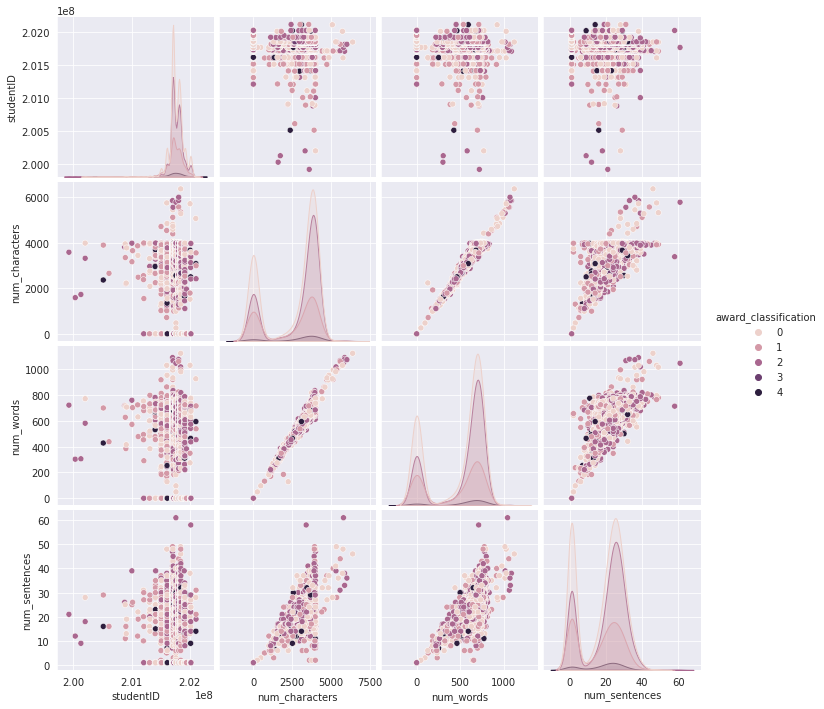

In [41]:
plt.figure(figsize=(14, 10))
sns.pairplot(df, hue='award_classification')

<AxesSubplot:>

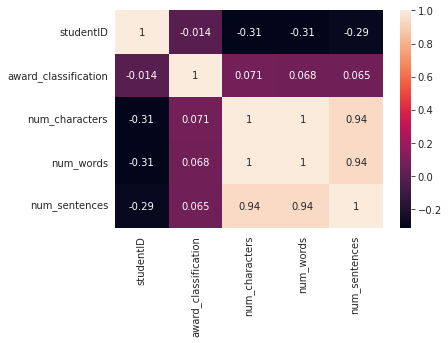

In [42]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

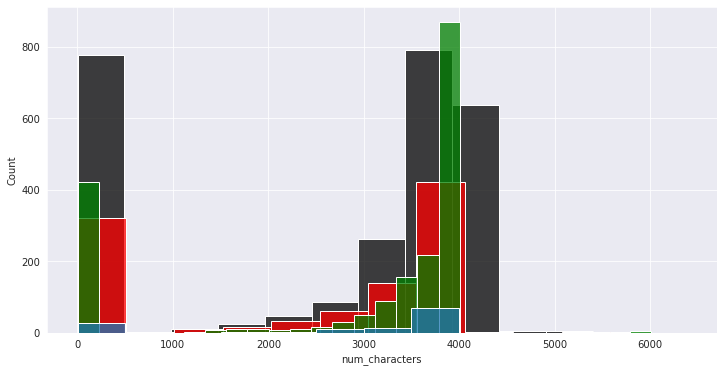

In [43]:
# Histogram plots for number of characters
plt.figure(figsize=(12, 6))
sns.histplot(df[df['award_classification'] == 0]['num_characters'], color='black')
sns.histplot(df[df['award_classification'] == 1]['num_characters'], color='red')
sns.histplot(df[df['award_classification'] == 2]['num_characters'], color='green')
sns.histplot(df[df['award_classification'] == 3]['num_characters'], color='yellow')
sns.histplot(df[df['award_classification'] == 4]['num_characters'])


<AxesSubplot:xlabel='num_words', ylabel='Count'>

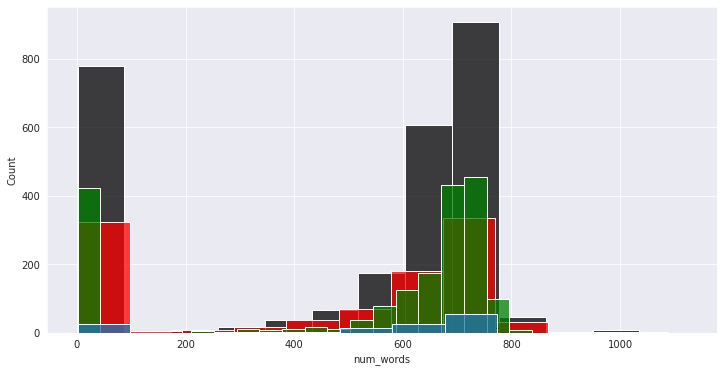

In [44]:
# Histogram plots for number of words
plt.figure(figsize=(12, 6))
sns.histplot(df[df['award_classification'] == 0]['num_words'], color='black')
sns.histplot(df[df['award_classification'] == 1]['num_words'], color='red')
sns.histplot(df[df['award_classification'] == 2]['num_words'], color='green')
sns.histplot(df[df['award_classification'] == 3]['num_words'], color='yellow')
sns.histplot(df[df['award_classification'] == 4]['num_words'])


<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

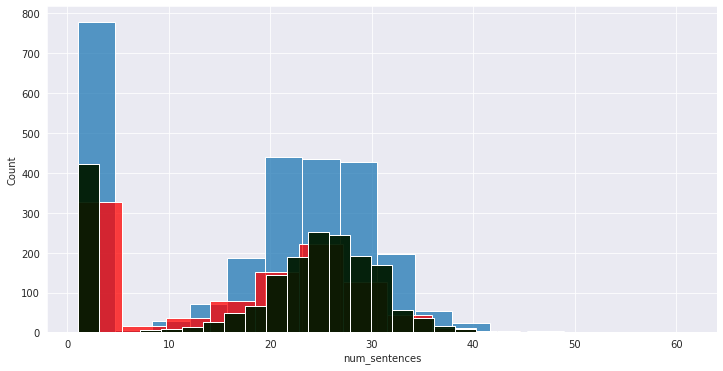

In [45]:
# Histogram plots for number of sentences
plt.figure(figsize=(12, 6))
sns.histplot(df[df['award_classification'] == 0]['num_sentences'])
sns.histplot(df[df['award_classification'] == 1]['num_sentences'], color='red')
sns.histplot(df[df['award_classification'] == 2]['num_sentences'], color='green')
sns.histplot(df[df['award_classification'] == 3]['num_sentences'], color='yellow')
sns.histplot(df[df['award_classification'] == 2]['num_sentences'], color='black')

# 3. DATA PREPROCESSING

Some of the data preprocessing steps to attain a final datasets for training are:

- Lower Casing
- Tokenization
- Removing Special Characters
- Removing Stop Words and Punctuations
- Stemming and Lemmatization


In [46]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/abbracx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
''' The stopwords in nltk are the most common words in data. 
They are words that you do not want to use to describe the topic of your content.
'''
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
# view puctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /home/abbracx/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/abbracx/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [50]:
# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [51]:
# Custom transform functions

def transform_text(text):
    # tansform to lower case and tokenize
    text = text.lower()
    text = nltk.word_tokenize(text)

    # retain only alpha-numeric words
    y = []
    for word in text:
        if word.isalnum():
            y.append(word)

    # re-assign all newly computed values from array 'y' to text    
    text = y[:]
    y.clear()

    # filter out stopwords and punctuations
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)


    # re-assign all newly computed values from array 'y' to text    
    text = y[:]
    y.clear()
    # lemmatize words and still conserver their meaning
    for i in text:
        y.append(lemmatizer.lemmatize(i))

    return " ".join(y)

In [52]:
# personal statement at index zero that hasn't been transformed

df.iloc[0]["personal_statement"]

'I am applying for the learning disability nursing as I feel that I am ready for a new direction/challenge in my career. I have worked with individuals with a learning disability and their friends and families for the last 16 years. I started as a care worker and worked my way up to my last post were I was a deputy manager of a residential home for adults with a learning disability. As much as I loved my job I didn\'t feel as though I was doing enough anymore as I became more office based than "hands on" and I missed the interaction with the individuals that I was caring for.an opportunity came up where I could do something about this, so after a lot of thinking it through, courage and determination I made the decision to leave my job and go back to university. I am currently doing the university certificate in health and social care practice and really enjoying the new challenge so far. I want to become a nurse so that I can support, educate and encourage individuals. I want to be abl

In [53]:
# transform the sentence at index zero that has been transformed 

trans_sentence = transform_text(df.iloc[0]["personal_statement"])

trans_sentence

'applying learning disability nursing feel ready new career worked individual learning disability friend family last 16 year started care worker worked way last post deputy manager residential home adult learning disability much loved job feel though enough anymore became office based hand missed interaction individual caring opportunity came could something lot thinking courage determination made decision leave job go back university currently university certificate health social care practice really enjoying new challenge far want become nurse support educate encourage individual want able help individual learning disability understand health need also help around understand communicate engage individual learning disability health setting also community career far gained lot skill knowledge take forward nursing career build progress skill knowledge also help day day life include communication aware communication take many form verbal non verbal communicating someone difficulty commun

In [54]:
# transform all documents

df['transformed_personal_statement'] = df['personal_statement'].apply(transform_text)

df.head(20)

,studentID,personal_statement,award_name,award_classification,num_characters,num_words,num_sentences,transformed_personal_statement
9,199921636,I am applying for the learning disability nurs...,Bachelor of Science with Honours,2,3590,721,21,applying learning disability nursing feel read...
13,200030551,I wish to apply to university this year as I w...,Bachelor of Arts with Honours,2,1593,303,12,wish apply university year want pursue life lo...
15,200127457,I have worked in mainstream and special educat...,Bachelor of Arts with Honours,2,1732,306,9,worked mainstream special education thirty yea...
16,200200708,At approximately six years old I remember sitt...,Bachelor of Arts with Honours,2,3324,581,18,approximately six year old remember sitting co...
18,200200788,"When I left school in 1994, I knew I wanted a ...",Bachelor of Science with Honours,0,3992,771,28,left school 1994 knew wanted career health car...
40,200512117,I have been looking forward to getting into te...,Bachelor of Arts with Honours,4,2368,428,16,looking forward getting teaching recently comp...
42,200513035,"Nursing, in my own perspective, is a diverse p...",Bachelor of Science with Honours,1,3903,699,29,nursing perspective diverse profession vast op...
46,200610674,I am enthusiastic about the nursing profession...,Bachelor of Science with Honours,1,2662,438,16,enthusiastic nursing profession feel requisite...
64,200878511,"Nursing to me is an invaluable profession, whi...",Bachelor of Science with Honours,2,3822,717,26,nursing invaluable profession rewarding challe...
74,200888939,The passion I have for nursing comes from witn...,Bachelor of Science with Honours,0,3956,715,25,passion nursing come witnessing phenomenal car...


In [55]:
df.head()['transformed_personal_statement']

9     applying learning disability nursing feel read...
13    wish apply university year want pursue life lo...
15    worked mainstream special education thirty yea...
16    approximately six year old remember sitting co...
18    left school 1994 knew wanted career health car...
Name: transformed_personal_statement, dtype: object

In [56]:
'''
    Using wordcloud to visualize degree of importance of words.
    
    Word Cloud is a data visualization technique used for representing text data in which 
    the size of each word indicates its frequency or importance. 
    
    Significant textual data points can be highlighted using a word cloud.
    
    Word clouds are widely used for analyzing data from social network websites.
'''

from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

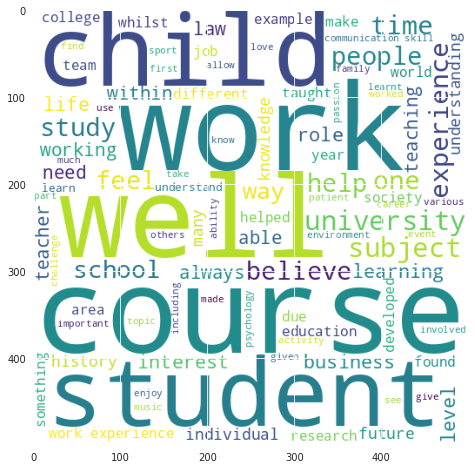

In [57]:
# degree of importance of words classified as 2:1

two_one_wc = wc.generate(df[df['award_classification'] == 0]['transformed_personal_statement'].str.cat(sep=" "))
plt.figure(figsize=(12, 8))
plt.imshow(two_one_wc)

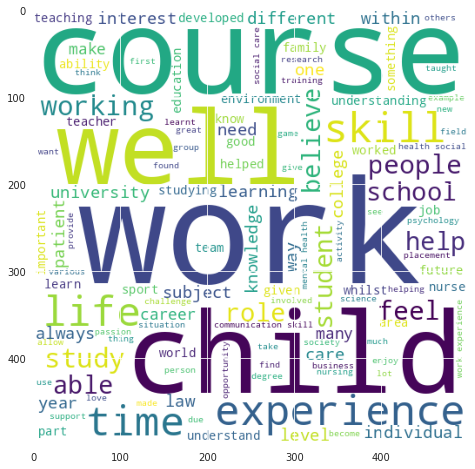

In [58]:
# degree of importance of words classified as 2:2

two_two_wc = wc.generate(df[df['award_classification'] == 1]['transformed_personal_statement'].str.cat(sep=" "))
plt.figure(figsize=(12, 8))
plt.imshow(two_two_wc)

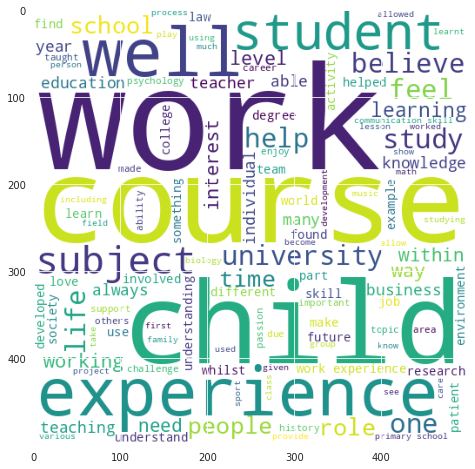

In [59]:
# degree of importance of words classified as First class

first_class_wc = wc.generate(df[df['award_classification'] == 2]['transformed_personal_statement'].str.cat(sep=" "))
plt.figure(figsize=(12, 8))
plt.imshow(first_class_wc)

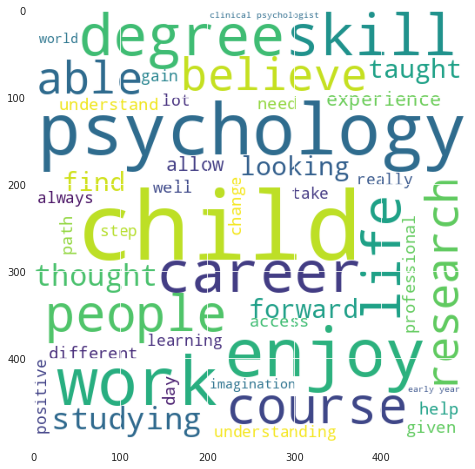

In [60]:
# degree of importance of words classified as PASS

pass_wc = wc.generate(df[df['award_classification'] == 3]['transformed_personal_statement'].str.cat(sep=" "))
plt.figure(figsize=(12, 8))
plt.imshow(pass_wc)

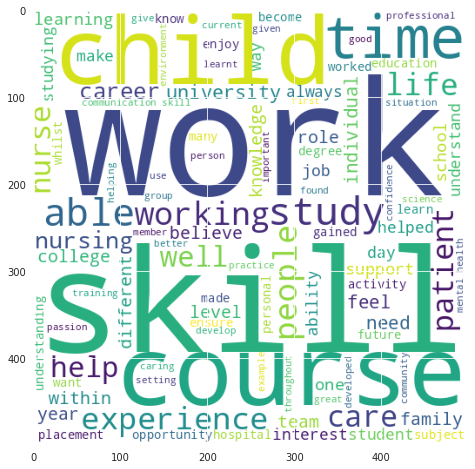

In [61]:
# degree of importance of words classified as THIRD

third_wc = wc.generate(df[df['award_classification'] == 4]['transformed_personal_statement'].str.cat(sep=" "))
plt.figure(figsize=(12, 8))
plt.imshow(third_wc)

## A. Box-plot of Two-One, to show degree of importance of words

In [62]:
from collections import Counter

In [63]:
two_one_corpus = []
for msg in df[df['award_classification'] ==0]['transformed_personal_statement'].tolist():
    for word in msg.split():
        two_one_corpus.append(word)

/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


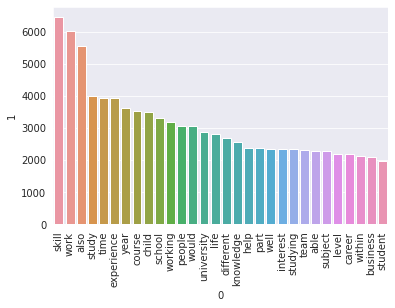

In [64]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(two_one_corpus).most_common(30))[0],pd.DataFrame(Counter(two_one_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## B. Box-plot of Two-Two, to show degree of importance of words

In [65]:
two_two_corpus = []
for msg in df[df['award_classification'] ==1]['transformed_personal_statement'].tolist():
    for word in msg.split():
        two_two_corpus.append(word)

/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


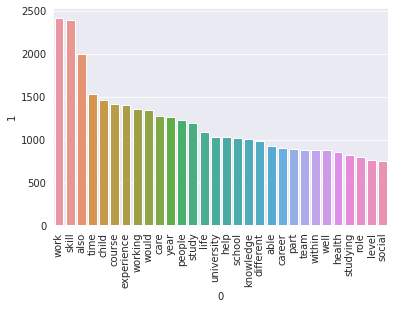

In [66]:
sns.barplot(pd.DataFrame(Counter(two_two_corpus).most_common(30))[0],pd.DataFrame(Counter(two_two_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## C. Box-plot of First Class, to show degree of importance of words

In [67]:
first_class_corpus = []
for msg in df[df['award_classification'] == 2]['transformed_personal_statement'].tolist():
    for word in msg.split():
        first_class_corpus.append(word)

/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


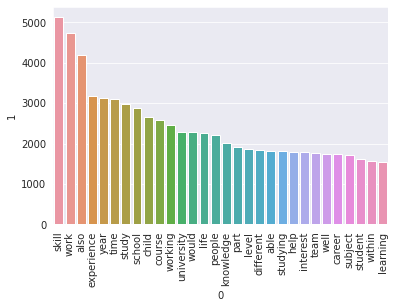

In [68]:
sns.barplot(pd.DataFrame(Counter(first_class_corpus).most_common(30))[0],pd.DataFrame(Counter(first_class_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## D. Box-plot of PASS, to show degree of importance of words

In [69]:
pass_corpus = []
for msg in df[df['award_classification'] == 3]['transformed_personal_statement'].tolist():
    for word in msg.split():
        pass_corpus.append(word)

/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


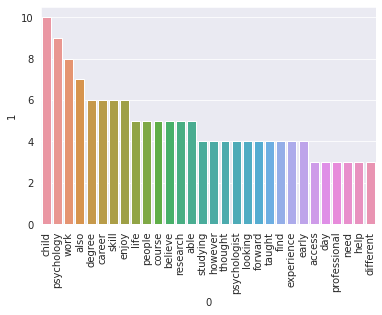

In [70]:
sns.barplot(pd.DataFrame(Counter(pass_corpus).most_common(30))[0],pd.DataFrame(Counter(pass_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## E. Box-plot of Third class, to show degree of importance of words


In [71]:
third_corpus = []
for msg in df[df['award_classification'] == 4]['transformed_personal_statement'].tolist():
    for word in msg.split():
        third_corpus.append(word)

/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


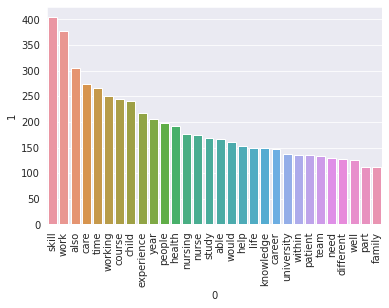

In [72]:
sns.barplot(pd.DataFrame(Counter(third_corpus).most_common(30))[0],pd.DataFrame(Counter(third_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In this section, we will introduce the ***Bag-of-Words model*** and also ***Word Embeddings***, which allows us to represent text as numerical feature vectors. 

**A**. The idea behind ***Bag-of-words*** is quite simple and can
be summarized as follows:

- We create a vocabulary of unique tokens, for example, words from the entire set of documents.
- We construct a feature vector from each document that contains the counts of how often each word occurs in the particular document.

**B**. The idea behind ***Word Embeddings*** is not far from ***Bag-of-words***, it is just an improvement, in the sence that it tries to infer meaning from a sentence containing group of words. It is more of a neural network.

**Checkout** [WORD EMBEDDINGS](https://machinelearningmastery.com/what-are-word-embeddings/)

**Checkout** [NLP Text to Vector Techniques](https://towardsdatascience.com/word-embedding-techniques-word2vec-and-tf-idf-explained-c5d02e34d08)


# Bag of Words using Term Frequency and/or Inverse Document Frequency (TF-IDF)

**Checkout**: [Bag-of-Words](towardsdatascience.com/3-basic-approaches-in-bag-of-words-which-are-better-than-word-embeddings-c2cbc7398016)

**Checkout** [Multiclass Text Classification with Scikit Learn](https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f)

In [73]:
'''
These stage has to do with Building feature vectors from text documents
TF-IDF is a statistical measure used to determine the mathematical significance of words in documents
'''

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, precision_score, classification_report

In [74]:
#  X = cv.fit_transform(df['transformed_personal_statement']).toarray()
tfidf = TfidfVectorizer(max_features=100, ngram_range=(1,2))
X = tfidf.fit_transform(df['transformed_personal_statement']).toarray()

In [75]:
X.shape

(5700, 100)

In [76]:
# append the num_character col to X
X = np.hstack((X, df['num_characters'].values.reshape(-1, 1)))
X.shape


(5700, 101)

In [77]:
# append the num_words col to X
X = np.hstack((X, df['num_words'].values.reshape(-1, 1)))
X.shape

(5700, 102)

In [78]:
# view the vocabulary of words created by TF-IDF from the entire Documents
tfidf.vocabulary_

{'learning': 48,
 'nursing': 58,
 'feel': 29,
 'new': 57,
 'career': 12,
 'individual': 41,
 'family': 28,
 'year': 98,
 'care': 11,
 'way': 90,
 'job': 43,
 'opportunity': 60,
 'something': 73,
 'made': 53,
 'university': 87,
 'currently': 18,
 'health': 36,
 'social': 72,
 'challenge': 13,
 'want': 89,
 'become': 8,
 'support': 79,
 'able': 1,
 'help': 37,
 'understand': 85,
 'need': 56,
 'also': 5,
 'gained': 32,
 'skill': 71,
 'knowledge': 44,
 'take': 80,
 'day': 19,
 'life': 50,
 'communication': 16,
 'many': 55,
 'people': 65,
 'age': 3,
 'develop': 21,
 'time': 84,
 'work': 94,
 'learn': 47,
 'helped': 38,
 'well': 91,
 'important': 40,
 'part': 62,
 'team': 83,
 'working': 95,
 'good': 34,
 'make': 54,
 'interest': 42,
 'history': 39,
 'always': 6,
 'school': 69,
 'teacher': 81,
 'would': 97,
 'teaching': 82,
 'education': 24,
 'study': 76,
 'different': 23,
 'course': 17,
 'research': 67,
 'given': 33,
 'subject': 78,
 'child': 14,
 'enjoy': 25,
 'experience': 27,
 'within': 

In [79]:
# The encoded award classification from categorical to numerical

y = df['award_classification'].values
y[:100]

array([2, 2, 2, 2, 0, 4, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 2, 1, 2, 4, 1,
       0, 0, 2, 1, 4, 0, 2, 1, 2, 0, 1, 0, 2, 2, 0, 0, 4, 1, 1, 1, 0, 1,
       1, 1, 0, 4, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 4, 2, 0, 0, 1, 0, 2, 0, 2, 1])

In [80]:
# split data into test and train. 20% of test size

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [81]:
# Testing the naive bayes classifiers

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

Checkout [Text-classification-with-naive-bayes-algorithm](https://www.educative.io/answers/how-to-do-text-classification-with-naive-bayes-algorithm)

In [82]:
# Create instances of the bayesian Classes

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [153]:
# MULTINOMIAL CLASSIFIER

mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)


print(f'Accuracy score: {accuracy_score(y_test, y_pred2)}')
print()
print(f'confusion matrix: \n\n {confusion_matrix(y_test, y_pred2)}')

print()
print(classification_report(y_test, y_pred1, target_names=['FIRST', '2:1', 'THIRD', '2:2', 'PASS']))

Accuracy score: 0.4842105263157895

confusion matrix: 

 [[791  12  19   0   0]
 [286  12   9   0   0]
 [515   9  25   0   0]
 [  1   0   0   0   0]
 [ 29   2   0   0   0]]

              precision    recall  f1-score   support

       FIRST       0.52      0.21      0.30       822
         2:1       0.21      0.37      0.27       307
       THIRD       0.39      0.39      0.39       549
         2:2       0.00      0.00      0.00         1
        PASS       0.06      0.58      0.12        31

    accuracy                           0.30      1710
   macro avg       0.24      0.31      0.21      1710
weighted avg       0.42      0.30      0.32      1710



/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [164]:
# GAUSSIAN CLASSIFIER

gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print(f'Accuracy score: {accuracy_score(y_test, y_pred1)}')
print()
print("Confusion matrix: \n\n", confusion_matrix(y_test, y_pred1, labels=gnb.classes_))
print()
print(classification_report(y_test, y_pred1, target_names=['FIRST', '2:1', 'THIRD', '2:2', 'PASS']))

GaussianNB()
Accuracy score: 0.30409356725146197

Confusion matrix: 

 [[175 277 256   0 114]
 [ 44 113  76   0  74]
 [113 146 214   0  76]
 [  0   1   0   0   0]
 [  2   8   3   0  18]]

              precision    recall  f1-score   support

       FIRST       0.52      0.21      0.30       822
         2:1       0.21      0.37      0.27       307
       THIRD       0.39      0.39      0.39       549
         2:2       0.00      0.00      0.00         1
        PASS       0.06      0.58      0.12        31

    accuracy                           0.30      1710
   macro avg       0.24      0.31      0.21      1710
weighted avg       0.42      0.30      0.32      1710



/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [163]:
# BERNOULLI CLASSIFIER

bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)


print(f'Accuracy score: {accuracy_score(y_test, y_pred3)}')
print()
print('Confusion Matrix: \n\n', confusion_matrix(y_test, y_pred3, labels=bnb.classes_))
print()
print(classification_report(y_test, y_pred3, target_names=['FIRST', '2:1', 'THIRD', '2:2', 'PASS']))

Accuracy score: 0.28596491228070176

Confusion Matrix: 

 [[ 37 246 457   2  80]
 [ 13  97 138   0  59]
 [ 23 124 343   7  52]
 [  0   0   1   0   0]
 [  1   9   9   0  12]]

              precision    recall  f1-score   support

       FIRST       0.50      0.05      0.08       822
         2:1       0.20      0.32      0.25       307
       THIRD       0.36      0.62      0.46       549
         2:2       0.00      0.00      0.00         1
        PASS       0.06      0.39      0.10        31

    accuracy                           0.29      1710
   macro avg       0.22      0.27      0.18      1710
weighted avg       0.39      0.29      0.23      1710



In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [171]:
# Support Vector Machine Classifier
svc = SVC(kernel='sigmoid', gamma=1.0)

# KNeighbour Classifier
knc = KNeighborsClassifier()

# Logistic Regression Classifier
lrc = LogisticRegression(solver='lbfgs', penalty='l2', multi_class='multinomial')

# Decision Tree Classifiers 

dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

In [189]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt
}

In [190]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f_one_score = f1_score(y_test, y_pred, average='weighted')
    print()
    print('Logging result for: ', clf)
    print('Accuracy Score: ', accuracy)
    print('F1 Score: ', f_one_score)
    print()
    print('Confusion Matrix: \n\n', confusion_matrix(y_test, y_pred, labels=clf.classes_))
    print()
    print(classification_report(y_test, y_pred, target_names=['FIRST', '2:1', 'THIRD', '2:2', 'PASS']))
    print('------------------------------------------------------------------------------------------------')
    print('------------------------------------------------------------------------------------------------')

In [191]:
for name, model in clfs.items():
    train_classifier(model, X_train, y_train, X_test, y_test)


Logging result for:  SVC(gamma=1.0, kernel='sigmoid')
Accuracy Score:  0.41228070175438597
F1 Score:  0.3477076077684212

Confusion Matrix: 

 [[584   0 238   0   0]
 [219   0  88   0   0]
 [428   0 121   0   0]
 [  1   0   0   0   0]
 [ 23   0   8   0   0]]

              precision    recall  f1-score   support

       FIRST       0.47      0.71      0.56       822
         2:1       0.00      0.00      0.00       307
       THIRD       0.27      0.22      0.24       549
         2:2       0.00      0.00      0.00         1
        PASS       0.00      0.00      0.00        31

    accuracy                           0.41      1710
   macro avg       0.15      0.19      0.16      1710
weighted avg       0.31      0.41      0.35      1710

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------


/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Logging result for:  KNeighborsClassifier()
Accuracy Score:  0.4274853801169591
F1 Score:  0.37509520572283483

Confusion Matrix: 

 [[598  59 165   0   0]
 [224  18  65   0   0]
 [409  26 114   0   0]
 [  0   1   0   0   0]
 [ 25   1   4   0   1]]

              precision    recall  f1-score   support

       FIRST       0.48      0.73      0.58       822
         2:1       0.17      0.06      0.09       307
       THIRD       0.33      0.21      0.25       549
         2:2       0.00      0.00      0.00         1
        PASS       1.00      0.03      0.06        31

    accuracy                           0.43      1710
   macro avg       0.40      0.21      0.20      1710
weighted avg       0.38      0.43      0.38      1710

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------

Logging result for:  DecisionTreeClassifier(max_depth=5)
Accuracy

/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Logging result for:  LogisticRegression(multi_class='multinomial')
Accuracy Score:  0.4807017543859649
F1 Score:  0.32891258336184853

Confusion Matrix: 

 [[805   0  17   0   0]
 [303   0   4   0   0]
 [532   0  17   0   0]
 [  1   0   0   0   0]
 [ 31   0   0   0   0]]

              precision    recall  f1-score   support

       FIRST       0.48      0.98      0.65       822
         2:1       0.00      0.00      0.00       307
       THIRD       0.45      0.03      0.06       549
         2:2       0.00      0.00      0.00         1
        PASS       0.00      0.00      0.00        31

    accuracy                           0.48      1710
   macro avg       0.19      0.20      0.14      1710
weighted avg       0.38      0.48      0.33      1710

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------

Logging result for:  RandomForestClassifie

/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Logging result for:  AdaBoostClassifier(random_state=2)
Accuracy Score:  0.3456140350877193
F1 Score:  0.3402982980130243

Confusion Matrix: 

 [[317 112 390   0   3]
 [120  38 148   0   1]
 [241  70 236   0   2]
 [  1   0   0   0   0]
 [ 13   3  15   0   0]]

              precision    recall  f1-score   support

       FIRST       0.46      0.39      0.42       822
         2:1       0.17      0.12      0.14       307
       THIRD       0.30      0.43      0.35       549
         2:2       0.00      0.00      0.00         1
        PASS       0.00      0.00      0.00        31

    accuracy                           0.35      1710
   macro avg       0.19      0.19      0.18      1710
weighted avg       0.35      0.35      0.34      1710

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------


/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Logging result for:  BaggingClassifier(n_estimators=50, random_state=2)
Accuracy Score:  0.460233918128655
F1 Score:  0.39756399323686725

Confusion Matrix: 

 [[627   7 188   0   0]
 [247   8  52   0   0]
 [389   8 152   0   0]
 [  1   0   0   0   0]
 [ 22   2   7   0   0]]

              precision    recall  f1-score   support

       FIRST       0.49      0.76      0.59       822
         2:1       0.32      0.03      0.05       307
       THIRD       0.38      0.28      0.32       549
         2:2       0.00      0.00      0.00         1
        PASS       0.00      0.00      0.00        31

    accuracy                           0.46      1710
   macro avg       0.24      0.21      0.19      1710
weighted avg       0.41      0.46      0.40      1710

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------


/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Logging result for:  ExtraTreesClassifier(n_estimators=50, random_state=2)
Accuracy Score:  0.44678362573099417
F1 Score:  0.37766526938156897

Confusion Matrix: 

 [[638  11 173   0   0]
 [243   9  55   0   0]
 [429   3 117   0   0]
 [  1   0   0   0   0]
 [ 24   2   5   0   0]]

              precision    recall  f1-score   support

       FIRST       0.48      0.78      0.59       822
         2:1       0.36      0.03      0.05       307
       THIRD       0.33      0.21      0.26       549
         2:2       0.00      0.00      0.00         1
        PASS       0.00      0.00      0.00        31

    accuracy                           0.45      1710
   macro avg       0.23      0.20      0.18      1710
weighted avg       0.40      0.45      0.38      1710

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------


/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Logging result for:  GradientBoostingClassifier(n_estimators=50, random_state=2)
Accuracy Score:  0.4567251461988304
F1 Score:  0.39995429829501367

Confusion Matrix: 

 [[624  13 172   0  13]
 [235  13  53   1   5]
 [391   9 144   0   5]
 [  1   0   0   0   0]
 [ 22   3   6   0   0]]

              precision    recall  f1-score   support

       FIRST       0.49      0.76      0.60       822
         2:1       0.34      0.04      0.08       307
       THIRD       0.38      0.26      0.31       549
         2:2       0.00      0.00      0.00         1
        PASS       0.00      0.00      0.00        31

    accuracy                           0.46      1710
   macro avg       0.24      0.21      0.20      1710
weighted avg       0.42      0.46      0.40      1710

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------


# WORD EMBEDDINGS TECHNIQUE USING Doc2Vec

Checkout: [A gentle introduction to Doc2Vec](https://medium.com/wisio/a-gentle-introduction-to-doc2vec-db3e8c0cce5e)

Checkout [Gensim Doc2Vec Tutorial on the IMDB Sentiment Dataset](https://github.com/RaRe-Technologies/gensim/blob/3c3506d51a2caf6b890de3b1b32a8b85f7566ca5/docs/notebooks/doc2vec-IMDB.ipynb)


## 1. Model Accuracy on personal statement classification using paragraph vector - Distributed Bag of Words (PV-DBOW)


DBOW is the doc2vec model analogous to Skip-gram model in word2vec. The paragraph vectors are obtained by training a neural network on the task of predicting a probability distribution of words in a paragraph given a randomly-sampled word from the paragraph.

In [98]:
import gensim
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from sklearn import utils
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

In [99]:
df_1 = df[["transformed_personal_statement", "award_classification"]].reset_index(drop=True)

In [100]:
df_1.head()

,transformed_personal_statement,award_classification
0,applying learning disability nursing feel read...,2
1,wish apply university year want pursue life lo...,2
2,worked mainstream special education thirty yea...,2
3,approximately six year old remember sitting co...,2
4,left school 1994 knew wanted career health car...,0


In [101]:
def tag_documents(text):
    tokens = []
    for word in nltk.word_tokenize(text):
        tokens.append(word)
    return tokens


### a. Document Tagging

In [102]:
# split data into test and train. 20% of test size
X1_train, X1_test= train_test_split(df_1, test_size=0.3, random_state=42)

X1_train_tagged = X1_train.apply(
    lambda x: TaggedDocument(words=tag_documents(x['transformed_personal_statement']), tags=[x.award_classification]), axis=1)

X1_test_tagged = X1_test.apply(
    lambda x: TaggedDocument(words=tag_documents(x['transformed_personal_statement']), tags=[x.award_classification]), axis=1)

In [103]:
X1_train_tagged.values[5]

TaggedDocument(words=['current', 'job', 'role', 'early', 'year', 'practitioner', 'allowed', 'chance', 'gain', '9', 'year', 'experience', 'working', 'child', 'nursery', 'year', 'time', 'covered', 'ppa', 'teacher', 'three', 'class', 'within', 'role', 'early', 'year', 'practitioner', 'planned', 'carried', 'range', 'activity', 'well', 'observation', 'assessment', 'area', 'learning', 'development', 'completing', 'task', 'given', 'great', 'insight', 'early', 'year', 'foundation', 'stage', 'also', 'opportunity', 'cover', 'maternity', 'leave', '6', 'month', 'time', 'planned', 'weekly', 'math', 'phonics', 'literacy', 'session', 'child', 'care', 'addition', 'worked', 'partnership', 'another', 'member', 'staff', 'plan', 'present', 'stay', 'play', 'session', 'parent', 'child', 'involved', 'getting', 'parent', 'participate', 'child', 'learning', 'engaging', 'practical', 'activity', 'among', 'thing', 'regularly', 'enhanced', 'indoor', 'outdoor', 'provision', 'made', 'bought', 'resource', 'develop', 

### b. Build vocabulary

In [104]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=-1)
model_dbow.build_vocab([x for x in tqdm(X1_train_tagged.values)])

100%|███████████████████████████████████| 3990/3990 [00:00<00:00, 239966.63it/s]


In [105]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(X1_train_tagged.values)]), total_examples=len(X1_train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████████████████████████████| 3990/3990 [00:00<00:00, 1062894.44it/s]


CPU times: user 799 ms, sys: 53.8 ms, total: 853 ms
Wall time: 945 ms


### c. Build a Vector Feature for the Classifier

In [106]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words, epochs=20)) for doc in sents])
    return targets, vectors


In [107]:
y2_train, X2_train = vec_for_learning(model_dbow, X1_train_tagged)

y2_test, X2_test = vec_for_learning(model_dbow, X1_test_tagged)




In [192]:
def dbow_train_classifier(clf, X2_train, y2_train, X2_test, y2_test):
    clf.fit(X2_train, y2_train)
    y_pred = clf.predict(X2_test)
    accuracy = accuracy_score(y2_test, y_pred)
    f_one_score = f1_score(y2_test, y_pred, average='weighted')
    
    print()
    print('Logging result for: ', clf)
    print('Accuracy Score: ', accuracy)
    print('F1 Score: ', f_one_score)
    print()
    print('Confusion Matrix: \n\n', confusion_matrix(y2_test, y_pred, labels=clf.classes_))
    print()
    print(classification_report(y_test, y_pred, target_names=['FIRST', '2:1', 'THIRD', '2:2', 'PASS']))
    print('------------------------------------------------------------------------------------------------')
    print('------------------------------------------------------------------------------------------------')

In [193]:
for name, dbow_model in clfs.items():
    dbow_train_classifier(dbow_model, X2_train, y2_train, X2_test, y2_test)


Logging result for:  SVC(gamma=1.0, kernel='sigmoid')
Accuracy Score:  0.47134502923976607
F1 Score:  0.30199053542706794

Confusion Matrix: 

 [[806   0   0   0   0]
 [307   0   0   0   0]
 [556   0   0   0   0]
 [  0   0   0   0   0]
 [ 41   0   0   0   0]]

              precision    recall  f1-score   support

       FIRST       0.48      1.00      0.65       822
         2:1       0.00      0.00      0.00       307
       THIRD       0.00      0.00      0.00       549
         2:2       0.00      0.00      0.00         1
        PASS       0.00      0.00      0.00        31

    accuracy                           0.48      1710
   macro avg       0.10      0.20      0.13      1710
weighted avg       0.23      0.48      0.31      1710

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------


/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Logging result for:  KNeighborsClassifier()
Accuracy Score:  0.42280701754385963
F1 Score:  0.38360836631192213

Confusion Matrix: 

 [[562  67 177   0   0]
 [195  26  86   0   0]
 [352  68 135   0   1]
 [  0   0   0   0   0]
 [ 28   4   9   0   0]]

              precision    recall  f1-score   support

       FIRST       0.49      0.67      0.56       822
         2:1       0.16      0.09      0.11       307
       THIRD       0.31      0.23      0.26       549
         2:2       0.00      0.00      0.00         1
        PASS       0.00      0.00      0.00        31

    accuracy                           0.41      1710
   macro avg       0.19      0.20      0.19      1710
weighted avg       0.36      0.41      0.38      1710

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------


/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Logging result for:  DecisionTreeClassifier(max_depth=5)
Accuracy Score:  0.45146198830409356
F1 Score:  0.3423782295845556

Confusion Matrix: 

 [[712   4  90   0   0]
 [277   3  27   0   0]
 [496   3  57   0   0]
 [  0   0   0   0   0]
 [ 34   0   7   0   0]]

              precision    recall  f1-score   support

       FIRST       0.48      0.88      0.62       822
         2:1       0.40      0.01      0.03       307
       THIRD       0.31      0.10      0.16       549
         2:2       0.00      0.00      0.00         1
        PASS       0.00      0.00      0.00        31

    accuracy                           0.46      1710
   macro avg       0.24      0.20      0.16      1710
weighted avg       0.40      0.46      0.35      1710

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------


/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Logging result for:  LogisticRegression(multi_class='multinomial')
Accuracy Score:  0.47134502923976607
F1 Score:  0.30199053542706794

Confusion Matrix: 

 [[806   0   0   0   0]
 [307   0   0   0   0]
 [556   0   0   0   0]
 [  0   0   0   0   0]
 [ 41   0   0   0   0]]

              precision    recall  f1-score   support

       FIRST       0.48      1.00      0.65       822
         2:1       0.00      0.00      0.00       307
       THIRD       0.00      0.00      0.00       549
         2:2       0.00      0.00      0.00         1
        PASS       0.00      0.00      0.00        31

    accuracy                           0.48      1710
   macro avg       0.10      0.20      0.13      1710
weighted avg       0.23      0.48      0.31      1710

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------


/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Logging result for:  RandomForestClassifier(n_estimators=50, random_state=2)
Accuracy Score:  0.45497076023391814
F1 Score:  0.36402660481304516

Confusion Matrix: 

 [[679   0 127   0   0]
 [252   0  55   0   0]
 [455   2  99   0   0]
 [  0   0   0   0   0]
 [ 29   0  12   0   0]]

              precision    recall  f1-score   support

       FIRST       0.48      0.82      0.60       822
         2:1       0.50      0.00      0.01       307
       THIRD       0.30      0.16      0.21       549
         2:2       0.00      0.00      0.00         1
        PASS       0.00      0.00      0.00        31

    accuracy                           0.45      1710
   macro avg       0.25      0.20      0.16      1710
weighted avg       0.41      0.45      0.36      1710

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------


/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Logging result for:  AdaBoostClassifier(random_state=2)
Accuracy Score:  0.37543859649122807
F1 Score:  0.3531517788416101

Confusion Matrix: 

 [[488 197 110   0  11]
 [190  71  42   0   4]
 [330 138  83   0   5]
 [  0   0   0   0   0]
 [ 24   9   8   0   0]]

              precision    recall  f1-score   support

       FIRST       0.49      0.61      0.54       822
         2:1       0.19      0.25      0.22       307
       THIRD       0.33      0.15      0.20       549
         2:2       0.00      0.00      0.00         1
        PASS       0.00      0.00      0.00        31

    accuracy                           0.39      1710
   macro avg       0.20      0.20      0.19      1710
weighted avg       0.37      0.39      0.36      1710

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------


/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Logging result for:  BaggingClassifier(n_estimators=50, random_state=2)
Accuracy Score:  0.45146198830409356
F1 Score:  0.3604264519715783

Confusion Matrix: 

 [[678   3 125   0   0]
 [248   2  57   0   0]
 [463   1  92   0   0]
 [  0   0   0   0   0]
 [ 36   0   5   0   0]]

              precision    recall  f1-score   support

       FIRST       0.49      0.84      0.62       822
         2:1       0.17      0.00      0.01       307
       THIRD       0.34      0.17      0.23       549
         2:2       0.00      0.00      0.00         1
        PASS       0.00      0.00      0.00        31

    accuracy                           0.46      1710
   macro avg       0.20      0.20      0.17      1710
weighted avg       0.37      0.46      0.37      1710

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------


/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Logging result for:  ExtraTreesClassifier(n_estimators=50, random_state=2)
Accuracy Score:  0.4543859649122807
F1 Score:  0.364638456303638

Confusion Matrix: 

 [[676   2 128   0   0]
 [265   2  40   0   0]
 [456   1  99   0   0]
 [  0   0   0   0   0]
 [ 37   0   4   0   0]]

              precision    recall  f1-score   support

       FIRST       0.48      0.84      0.62       822
         2:1       0.00      0.00      0.00       307
       THIRD       0.30      0.15      0.20       549
         2:2       0.00      0.00      0.00         1
        PASS       0.00      0.00      0.00        31

    accuracy                           0.45      1710
   macro avg       0.16      0.20      0.16      1710
weighted avg       0.33      0.45      0.36      1710

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------


/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Logging result for:  GradientBoostingClassifier(n_estimators=50, random_state=2)
Accuracy Score:  0.4426900584795322
F1 Score:  0.34488189974350286

Confusion Matrix: 

 [[687  13  95   1  10]
 [265   1  39   0   2]
 [480   3  67   1   5]
 [  0   0   0   0   0]
 [ 35   0   4   0   2]]

              precision    recall  f1-score   support

       FIRST       0.48      0.86      0.62       822
         2:1       0.18      0.01      0.02       307
       THIRD       0.32      0.12      0.18       549
         2:2       0.00      0.00      0.00         1
        PASS       0.00      0.00      0.00        31

    accuracy                           0.45      1710
   macro avg       0.20      0.20      0.16      1710
weighted avg       0.37      0.45      0.36      1710

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------


## 2. Model Accuracy on personal statement classification using paragraph vector - Distributed Memory (PV-DM)

Distributed Memory (DM) acts as a memory that remembers what is missing from the current context — or as the topic of the paragraph. While the word vectors represent the concept of a word, the document vector intends to represent the concept of a document.


CHECKOUT: [Distributed Representations of Sentences and Documents](https://cs.stanford.edu/~quocle/paragraph_vector.pdf)

In [111]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(X1_train_tagged.values)])

100%|██████████████████████████████████| 3990/3990 [00:00<00:00, 1592167.53it/s]


In [112]:
%%time
for epoch in range(30):
    model_dmm.train(utils.shuffle([x for x in tqdm(X1_train_tagged.values)]), total_examples=len(X1_train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

100%|██████████████████████████████████| 3990/3990 [00:00<00:00, 1662884.83it/s]


CPU times: user 5min 4s, sys: 3.77 s, total: 5min 7s
Wall time: 1min 47s


In [113]:
y3_train, X3_train = vec_for_learning(model_dmm, X1_train_tagged)
y3_test, X3_test = vec_for_learning(model_dmm, X1_train_tagged)

### Testing a Logistic Regression on a DM

In [114]:
lrc.fit(X3_train, y3_train)
y_pred = lrc.predict(X3_test)

/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [115]:
print('Testing accuracy %s' % accuracy_score(y3_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y3_test, y_pred, average='weighted')))

Testing accuracy 0.7694235588972431
Testing F1 score: 0.7635455957910088


### Test Support Vector Classifier on a DM

In [116]:
svc.fit(X3_train, y3_train)
y_pred = svc.predict(X3_test)

In [117]:
print('Testing accuracy %s' % accuracy_score(y3_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y3_test, y_pred, average='weighted')))

Testing accuracy 0.46265664160401004
Testing F1 score: 0.2941576871568281


### Test  K-NEIGHBOUR on a DM

In [118]:
knc.fit(X3_train, y3_train)
y_pred = knc.predict(X3_test)

In [119]:
print('Testing accuracy %s' % accuracy_score(y3_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y3_test, y_pred, average='weighted')))

Testing accuracy 0.5654135338345865
Testing F1 score: 0.5226408276038093


### Test an ExtraTreeClassifier on a DM

In [120]:
etc.fit(X3_train, y3_train)
y_pred = etc.predict(X3_test)

In [121]:
print('Testing accuracy %s' % accuracy_score(y3_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y3_test, y_pred, average='weighted')))

Testing accuracy 0.6977443609022557
Testing F1 score: 0.6549564378887179


### Test a  BaggingClassifier on a DM

In [122]:
bc.fit(X3_train, y3_train)
y_pred = bc.predict(X3_test)

In [123]:
print('Testing accuracy %s' % accuracy_score(y3_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y3_test, y_pred, average='weighted')))

Testing accuracy 0.6573934837092732
Testing F1 score: 0.6075807495984579


### Test a GradientBoostingClassifier on a DM

In [124]:
gbdt.fit(X3_train, y3_train)
y_pred = gbdt.predict(X3_test)

In [125]:
print('Testing accuracy %s' % accuracy_score(y3_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y3_test, y_pred, average='weighted')))

Testing accuracy 0.6293233082706767
Testing F1 score: 0.583962154249634


### Testing an AdaBoostClassifier on a DM

In [126]:
abc.fit(X3_train, y3_train)
y_pred = abc.predict(X3_test)

In [127]:
print('Testing accuracy %s' % accuracy_score(y3_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y3_test, y_pred, average='weighted')))

Testing accuracy 0.43583959899749375
Testing F1 score: 0.38635929294221955


### Testing a RandomForestClassifier on a DM

In [128]:
rfc.fit(X3_train, y3_train)
y_pred = rfc.predict(X3_test)

In [129]:
print('Testing accuracy %s' % accuracy_score(y3_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y3_test, y_pred, average='weighted')))

Testing accuracy 0.6516290726817042
Testing F1 score: 0.5977692558564693


# Model Pairing

In [194]:
# Research shows that model pairing increases the accuracy by a little percentage
# We will be combining the dbow and dm models as one model then observe the improvement in accuracy

In [195]:
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec

In [196]:
# concatenate OR merge the two models

concat_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

In [133]:
def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words, epochs=20)) for doc in sents])
    return targets, vectors

In [134]:
# Train the model again
concat_y_train, concat_X_train = get_vectors(concat_model, X1_train_tagged)
concat_y_test, concat_X_test = get_vectors(concat_model, X1_train_tagged)

## Training the concatenated model on the top three model that did well above.

In [226]:
from sklearn.metrics import ConfusionMatrixDisplay

### Logistic Regression

In [227]:
lrc.fit(concat_X_train, concat_y_train)
y_pred = lrc.predict(concat_X_test)

/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [228]:
print('Test accuracy %s' %accuracy_score(concat_y_test, y_pred))
print('Test F1 score: {}'.format(f1_score(concat_y_test, y_pred, average='weighted')))

Test accuracy 0.7724310776942356
Test F1 score: 0.7669867539839775


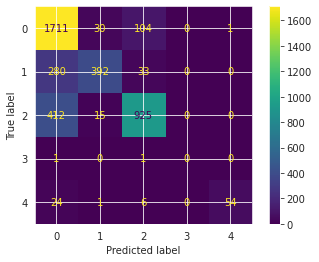

In [229]:
# Logging a confusion matrix

cm = confusion_matrix(concat_y_test, y_pred, labels=lrc.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lrc.classes_)
disp.plot()
plt.show()

In [230]:
# Confusion Matrix

print(classification_report(concat_y_test, y_pred, target_names=['FIRST', '2:1', 'THIRD', '2:2', 'PASS']))

              precision    recall  f1-score   support

       FIRST       0.70      0.93      0.80      1846
         2:1       0.89      0.56      0.69       705
       THIRD       0.87      0.68      0.76      1352
         2:2       0.00      0.00      0.00         2
        PASS       0.98      0.64      0.77        85

    accuracy                           0.77      3990
   macro avg       0.69      0.56      0.60      3990
weighted avg       0.80      0.77      0.77      3990



/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

### ExtraTree Classifier

In [231]:
etc.fit(concat_X_train, concat_y_train)
y_pred = etc.predict(concat_X_test)

In [232]:
print('Test accuracy %s' %accuracy_score(concat_y_test, y_pred))
print('Test F1 score: {}'.format(f1_score(concat_y_test, y_pred, average='weighted')))

Test accuracy 0.8300751879699249
Test F1 score: 0.8247167644086041


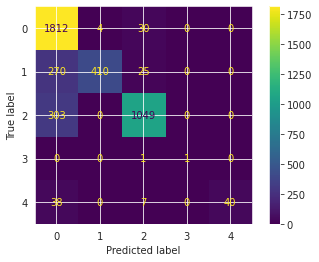

In [233]:
# Logging a confusion matrix

cm = confusion_matrix(concat_y_test, y_pred, labels=etc.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=etc.classes_)
disp.plot()
plt.show()

In [234]:
# Confusion Matrix

print(classification_report(concat_y_test, y_pred, target_names=['FIRST', '2:1', 'THIRD', '2:2', 'PASS']))

              precision    recall  f1-score   support

       FIRST       0.75      0.98      0.85      1846
         2:1       0.99      0.58      0.73       705
       THIRD       0.94      0.78      0.85      1352
         2:2       1.00      0.50      0.67         2
        PASS       1.00      0.47      0.64        85

    accuracy                           0.83      3990
   macro avg       0.94      0.66      0.75      3990
weighted avg       0.86      0.83      0.82      3990



### Random Forest

In [235]:
rfc.fit(concat_X_train, concat_y_train)
y_pred = rfc.predict(concat_X_test)

In [236]:
print('Test accuracy %s' %accuracy_score(concat_y_test, y_pred))
print('Test F1 score: {}'.format(f1_score(concat_y_test, y_pred, average='weighted')))

Test accuracy 0.7588972431077694
Test F1 score: 0.7341335929460028


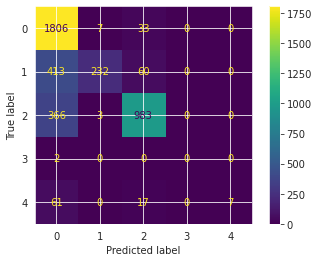

In [237]:
# Logging a confusion matrix

cm = confusion_matrix(concat_y_test, y_pred, labels=rfc.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
plt.show()

In [238]:
# Confusion Matrix

print(classification_report(concat_y_test, y_pred, target_names=['FIRST', '2:1', 'THIRD', '2:2', 'PASS']))

              precision    recall  f1-score   support

       FIRST       0.68      0.98      0.80      1846
         2:1       0.96      0.33      0.49       705
       THIRD       0.90      0.73      0.80      1352
         2:2       0.00      0.00      0.00         2
        PASS       1.00      0.08      0.15        85

    accuracy                           0.76      3990
   macro avg       0.71      0.42      0.45      3990
weighted avg       0.81      0.76      0.73      3990



/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

## Summary

From the above we can see that there is an improvement, with **Logistic Regression Accuracy = 0.77,** 
**ExtraTreeClassifier = 0.83** and **RandomForestClassifier = 0.75**

## Conclusion and Future work